# CC5215: Privacidad de Datos
## Laboratorio 3
**Integrantes**

- Nombre apellido

In [26]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from unittest.mock import patch

plt.style.use('seaborn-v0_8-whitegrid')

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

adult = pd.read_csv('https://users.dcc.uchile.cl/~mtoro/cursos/cc5215/adult_with_pii.csv')
adult = adult.dropna()

In [27]:
adult.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Question 1 (5 points)

Write code to answer the query: "how many participants have never been married?"

*Hint*: filter the `adult` dataframe to contain only participants who were never married, then return the  `len` of the filtered dataframe.

In [28]:
def never_married_count_query():
    nunca_casados = adult[adult['Marital Status'] == 'Never-married']
    cantidad_nunca_casados = len(nunca_casados)
    return cantidad_nunca_casados
    raise NotImplementedError()

never_married_count_query()

9726

In [29]:
# TEST CASE for question 1
assert never_married_count_query() == 9726

## Question 2 (5 points)

In 2-5 sentences, answer the following:
- What is the sensitivity of `never_married_count_query`, and why?

ANSWER: 
La sensibilidad de la consulta never_married_count_query es 1, porque al agregar o eliminar un solo participante del conjunto de datos, el conteo de personas que nunca se casaron puede cambiar a lo más en uno. Esto es porque la consulta simplemente es un conteo directo de los registros que cumplen una condición. En el caso de que la persona agregada o eliminada nunca se haya casado, entonces la diferencia en el conteo será uno. En el caso de que sí se haya casado, el conteo será el mismo. Por lo tanto la diferencia será de 1. 

## Question 3 (5 points)

Use the implementation of `laplace_mech` to produce a differentially private answer to `never_married_count_query`, with `epsilon = 0.1`.

In [33]:

def dp_never_married_count_query(epsilon):
    #usamos la función definida anteriormente para 
    #el conteo de personas no casadas.
    never_married_count = never_married_count_query()
    #ahora definimos la sensibilidad.
    sensibilidad = 1
    #aplicamos el mecanismo de laplace al resultado
    #de la consulta, donde éste lo que hace es agregar
    #un ruido a la cantidad de personas que nunca se han casado.
    conteo_ruido = laplace_mech(never_married_count, sensibilidad, epsilon)

    return conteo_ruido
    raise NotImplementedError()

dp_never_married_count_query(0.1)

9722.569601665491

In [34]:
# TEST CASE for question 3
dp_results = [dp_never_married_count_query(0.1) for _ in range(100)]
spec = [np.random.laplace(loc=9726, scale=1/0.1) for _ in range(100)]
assert stats.wasserstein_distance(dp_results, spec) < 10

# Question 4 (10 points)

Write the implementation of a class `DPPrinter` that collects the results of differentially private computations along with the used epsilon. Also, implement the method `print` that prints the results collected along with the total epsilon.

In [51]:
class DPPrinter():
    results = []
    epsilon = 0

    def push(self, result, eps):
        """
        Receives a differentially private result and the epsilon used to
        privatize the original result, and it stores them in the class
        """
        #esto lo que hace es guardar en results los
        #epsilon que vayamos usando a medida que #hacemos consultas diferentes.
        self.results.append((result, eps))
        
        #el valor de epsilon se va actualizando con la #suma, es decir, el ruido va aumentando a #medida que hacemos más consultas. 
        self.epsilon += eps

    def print(self):
        """
        Prints the results collected so far and the total epsilon
        """
        #aqui hago un bucle for que recorre la lista self.results,
        #donde i es el índice de dicha lista, mientras que res y eps 
        #son tuplas que contienen los resultados de la consulta y el epsilon
        #usado para cada caso. Recordemos que enumerate nos permite recorrer
        #una lista por su índice y por su valor (en este caso el valor es una #tupla). El ",0" dentro de enumerate es para indicarle a la funcion enumerate desde qué índice empezar.
        resultados = self.results
        epsilon = self.epsilon
        for i, (res, eps) in enumerate(resultados, 0):
            print(f"El índice es: {i},  el resultado de la consulta es: {res} (con un ε = {eps})")
        #aqui se imprime el valor de epsilon total acumulado.
        print(f"\nEpsilon total acumulado: {epsilon}")

printer = DPPrinter()

printer.push(dp_never_married_count_query(0.1), 0.1)
printer.push(dp_never_married_count_query(1.0), 1.0)
printer.push(dp_never_married_count_query(0.1), 0.1)

printer.print()

El índice es: 0,  el resultado de la consulta es: 9734.106905266159 (con un ε = 0.1)
El índice es: 1,  el resultado de la consulta es: 9720.886779214721 (con un ε = 1.0)
El índice es: 2,  el resultado de la consulta es: 9716.524232193608 (con un ε = 0.1)

Epsilon total acumulado: 1.2000000000000002


In [52]:
assert len(printer.results) == 3
assert np.isclose(printer.epsilon, 1.2)

## Question 5 (10 points)

The `pct_error` function, defined below, returns the percent relative error between an original query result and a differentially private result for the same query.

Implement a function `graph_error_never_married` that:

- Calculates 1000 differentially private answers to `dp_never_married_count_query`
- Calculates the percent error for each one of these answers against the original (non-private) answer
- Graphs the distribution of errors using a histogram

*Hint*: use `plt.hist(..., bins=20)`.

The given code will use your function to plot errors for `epsilon=0.1` and `epsilon=1.0`.

In [55]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

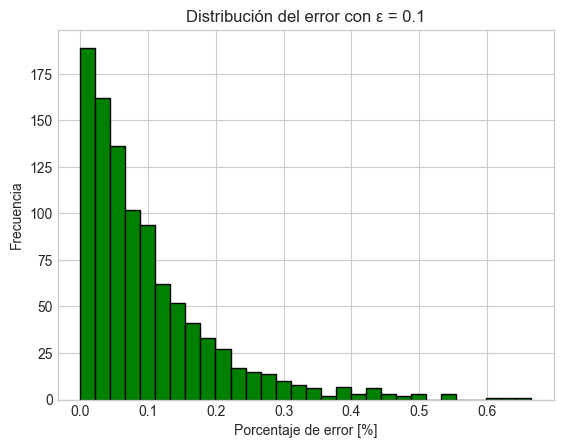

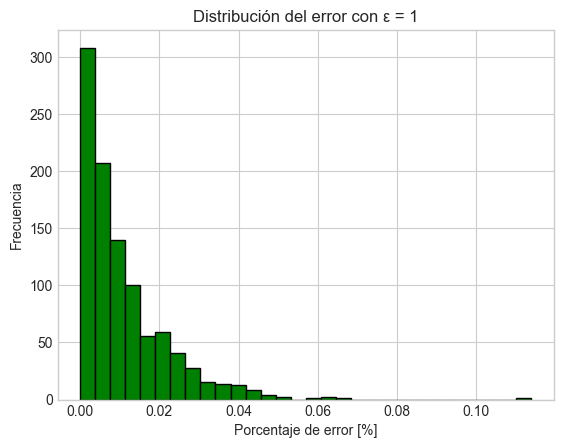

In [57]:

import matplotlib.pyplot as plt
def graph_error_never_married(epsilon):
    #esta función lo que hace es graficar las distribuciones de los #porcentajes de error de las consultas. Por lo tanto, me interesaría como menos tener una porcentajes_de_error de pct_error que usen la función #dp_never_married_count_query, y que lo hagan con un epsilon fijo.
    porcentajes_de_error = []
    for i in range(1000):
        consulta_original = never_married_count_query()
        consulta_error = dp_never_married_count_query(epsilon)
        error = pct_error(consulta_original, consulta_error)
        porcentajes_de_error.append(error)
    #Ahora simplemente graficamos la distribución de los errores porcentuales.
    plt.hist(porcentajes_de_error, bins=30, color='green', edgecolor='black')
    plt.title(f"Distribución del error con ε = {epsilon}")
    plt.xlabel("Porcentaje de error [%]")  
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

graph_error_never_married(0.1)
graph_error_never_married(1)

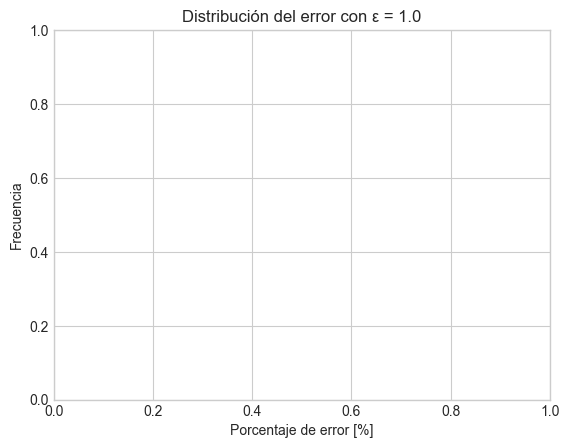

In [58]:
error_spec = 100.0 * np.abs(np.random.laplace(loc=0, scale=1, size=1000)) / never_married_count_query()

with patch('matplotlib.pyplot.hist') as mock_hist:
    graph_error_never_married(1.0)

args, kwargs = mock_hist.call_args
assert stats.wasserstein_distance(error_spec, args[0]) < 0.001

## Question 6 (10 points)

In 2-5 sentences, answer the following:

1. How does the histogram of relative errors for $\epsilon = 0.1$ differ from the one for $\epsilon = 1.0$?
2. What do the two histograms tell you about the effect of $\epsilon$ on relative error?

**HINT**: Pay close attention to which color represents which value of $\epsilon$!

ANSWER 1:

ANSWER 2:

## Question 7 (5 points)

Consider `over_60_count_query`, which asks how many people in the dataset are over the age of 60.

In [ ]:
def over_60_count_query():
    return len(adult[adult['Age'] > 60])

Implement `dp_over_60_count_query`, a differentially private version of `over_60_count_query` (as in question 3), and `graph_error_over_60`, which graphs relative error for `dp_over_60_count_query` (as in question 5).

In [ ]:
def dp_over_60_count_query(epsilon):
    # YOUR CODE HERE
    raise NotImplementedError()

def graph_error_over_60(epsilon):
    # YOUR CODE HERE
    raise NotImplementedError()

# we plot both errors for never_married_count_query and over_60_count_query
# at the same epsilon, to compare
graph_error_over_60(1.0)
graph_error_never_married(1.0)

In [ ]:
error_spec = 100.0 * np.abs(np.random.laplace(loc=0, scale=1, size=1000)) / over_60_count_query()

with patch('matplotlib.pyplot.hist') as mock_hist:
    graph_error_over_60(1.0)

args, kwargs = mock_hist.call_args
assert stats.wasserstein_distance(error_spec, args[0]) < 0.01

## Question 8 (10 points)

In 2-5 sentences, answer the following:

1. Given the graph from question 5, how does relative error differ between `dp_never_married_count_query` and `dp_over_60_count_query` for the same value of $\epsilon$?
2. What property of the query causes the difference in relative errors between `dp_never_married_count_query` and `dp_over_60_count_query`?

ANSWER 1:

ANSWER 2: